In [2]:
#importamos las librerias necesarias

import numpy as np  #librería para las operaciones numericas
import matplotlib.pyplot as plt # librería para visualización de graficos 
import pandas as pd #sirve para datos tabulares
import pickle #sirve para guardar y cargar objetos python
import torch # esta es la librería pytorch
import torch.nn as nn#importamos modelos de redes neuronales de pytorch
import torch.optim as optim#importmaos optimizadores de pytorch
from torch.utils.data import DataLoader, Dataset, TensorDataset # Importar herramientas para manejo de datos en PyTorch
from torchsummary import summary #importamos librería que nos permite mostrar resumen del modelo (lo hice para verificar la cantidad de parametros)

# Cargar el archivo unlab_test.pkl
with open('unlab_test.pkl', 'rb') as file:
    data_test = pickle.load(file)

# printea el diccionario cargado
print(data_test.keys())

dict_keys(['temp_images', 'SNR_images', 'diff_images', 'sci_images', 'ID'])


In [3]:
# Cargar el archivo data_train.pkl
with open('data_train.pkl', 'rb') as file:
    data_train = pickle.load(file)

# Imprimir las keys del diccionario cargado
print(data_train.keys())

# Imprimir la forma de las imágenes y labels
print(data_train['sci_images'].shape)  
print(data_train['labels'].shape) 

dict_keys(['temp_images', 'SNR_images', 'diff_images', 'sci_images', 'labels', 'ID'])
(4026, 441)
(4026,)


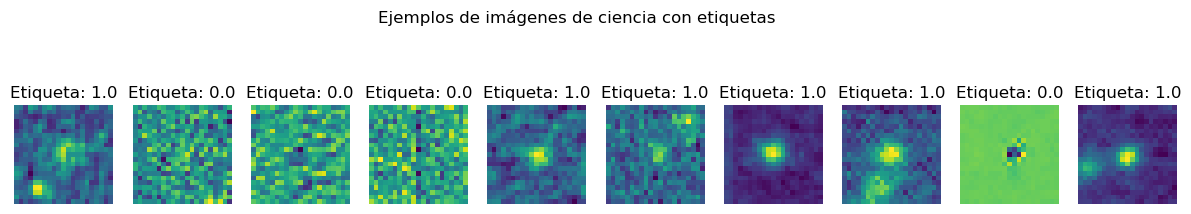

In [5]:
#tenía curiosidad de como se veian las imagenes

# Obtener datos de entrenamiento y labels/etiquetas
X_train = data_train['sci_images']
y_train = data_train['labels']

# Reformatear las imagenes de ciencia a matrices bidimensionales (21x21 pixeles)
X_train_reshaped = X_train.reshape(-1, 21, 21)

# Visualizar ejemplos de imágenes de ciencia junto con sus tags
num_ejemplos = 10 
fig, axs = plt.subplots(1, num_ejemplos, figsize=(15, 3)) # Crear subfiguras

for i in range(num_ejemplos): # Iterar sobre los ejemplos a mostrar
    axs[i].imshow(X_train_reshaped[i])#muestra la imagen
    axs[i].set_title('Etiqueta: {}'.format(y_train[i]))# Establecer el título como el label/etiqueta
    axs[i].axis('off')# Desactivar ejes

plt.suptitle('Ejemplos de imágenes de ciencia con etiquetas')
plt.show()

In [52]:
from sklearn.model_selection import train_test_split # Importar función para dividir datos

# Dividir datos de entrenamiento en conjunto de entrenamiento y conjunto de validación (81% entrenamiento, 19% validación)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.17, random_state=40) #aqui el random state es una seed que ayuda a reproducir el experimento

In [53]:
import torch.nn.functional as F # Importar funciones de activación de PyTorch
# Definir una CNN
class CNN(nn.Module): # Definir una clase que herede de nn.Module
    def __init__(self): 
        super(CNN, self).__init__()  # Llamar al inicializador de la clase padre
        # Definir las capas de la red neuronal
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3) # Capa de convolución con 1 canal de entrada, 32 canales de salida y kernel de tamaño 3x3
        self.relu = nn.ReLU()  # Función de activación ReLU
        self.maxpool = nn.MaxPool2d(kernel_size=2)  # Capa de max pooling con kernel de tamaño 2x2
        self.dropout = nn.Dropout(p=0.50)  # Agregar Dropout con probabilidad de 0.5
        self.fc1 = nn.Linear(32 * 9 * 9, 90)# Capa conectada con 32*9*9 neuronas de entrada y 90 de salida
        self.fc2 = nn.Linear(90, 2)# Capa conectada con 90 neuronas de entrada y 2 neuronas de salida (clasificación binaria)
    def forward(self, x):
        # Pasar la entrada x a través de las capas definidas en el constructor
        x = self.conv1(x)  # Capa de convolución
        x = self.relu(x)   # Función de activación ReLU
        x = self.maxpool(x)  # Capa de max pooling
        x = self.dropout(x)  # Aplicar Dropout 
        x = x.view(x.size(0), -1)  # Aplanar la salida para las capas completamente conectadas
        x = self.fc1(x)  # Primera capa completamente conectada
        x = self.relu(x)  # Función de activación ReLU 
        x = self.fc2(x)  # Segunda capa completamente conectada (salida)
        return x

In [54]:
# Convertir datos de entrenamiento y validación a tensores de PyTorch
X_train_tensor = torch.Tensor(X_train.reshape(-1, 1, 21, 21))  # Reformato datos para que sean compatibles con PyTorch
y_train_tensor = torch.LongTensor(y_train) # Convertir tags de entrenamiento a tensores
X_val_tensor = torch.Tensor(X_val.reshape(-1, 1, 21, 21))  # Reformato datos para que sean compatibles con PyTorch
y_val_tensor = torch.LongTensor(y_val) # Convertir tags de entrenamiento a tensores

# Crear DataLoader para datos de entrenamiento y validación
batch_size = 32  # Tamaño del lote
train_loader = DataLoader(dataset=TensorDataset(X_train_tensor, y_train_tensor), batch_size=batch_size, shuffle=True)
val_loader = DataLoader(dataset=TensorDataset(X_val_tensor, y_val_tensor), batch_size=batch_size)

Epoch [1/100], Train Loss: 1.5570, Train Accuracy: 69.53%, Val Loss: 0.5370, Val Accuracy: 89.73%
Epoch [2/100], Train Loss: 0.5579, Train Accuracy: 85.00%, Val Loss: 0.4590, Val Accuracy: 92.41%
Epoch [3/100], Train Loss: 0.4885, Train Accuracy: 91.13%, Val Loss: 0.4286, Val Accuracy: 95.09%
Epoch [4/100], Train Loss: 0.4521, Train Accuracy: 91.40%, Val Loss: 0.3967, Val Accuracy: 94.64%
Epoch [5/100], Train Loss: 0.4324, Train Accuracy: 92.68%, Val Loss: 0.3668, Val Accuracy: 93.75%
Epoch [6/100], Train Loss: 0.3569, Train Accuracy: 94.42%, Val Loss: 0.3513, Val Accuracy: 96.43%
Epoch [7/100], Train Loss: 0.3720, Train Accuracy: 94.24%, Val Loss: 0.3337, Val Accuracy: 94.64%
Epoch [8/100], Train Loss: 0.3267, Train Accuracy: 94.60%, Val Loss: 0.3147, Val Accuracy: 95.98%
Epoch [9/100], Train Loss: 0.2989, Train Accuracy: 94.78%, Val Loss: 0.3020, Val Accuracy: 95.98%
Epoch [10/100], Train Loss: 0.3274, Train Accuracy: 93.60%, Val Loss: 0.2848, Val Accuracy: 95.54%
Epoch [11/100], Tra

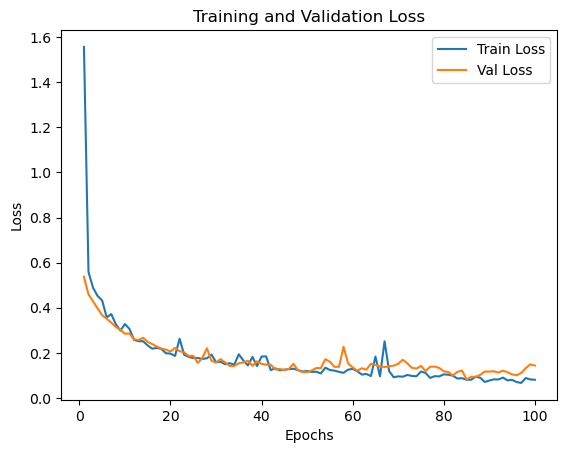

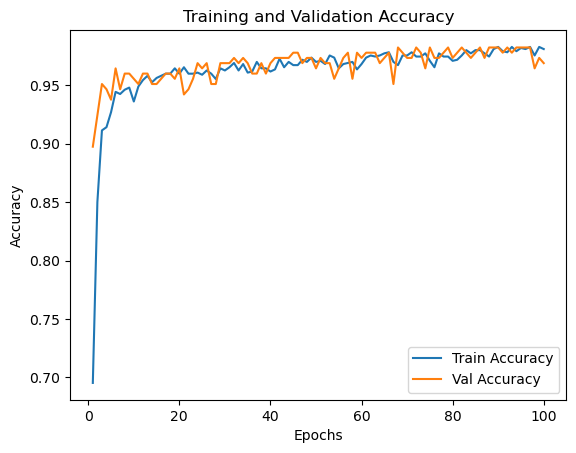

In [55]:
# Crear una instancia de la red neuronal CNN
model = CNN()

# Definir función de pérdida y optimizador
criterion = nn.CrossEntropyLoss() #entropia cruzada
optimizer = optim.Adam(model.parameters(), lr=0.001) #optimizador adam

######################
#a partir de aqui empieza el entrenamiento del modelo
####################

#lo que se genera aqui son listas para almacenar diferentes datos
train_losses = [] #loss de entrenamiento
train_accuracies = [] # acurracy de entrenamiento
val_losses = [] #loss de validación
val_accuracies = [] # acurracy de validación

num_epochs = 100 #numero de epocas de entrenamiento 
for epoch in range(num_epochs):  # iteramos sobre las épocas
    model.train() #aqui se pone el modelo en modo entrenamiento 
    epoch_train_losses = [] #lista para loss de entrenamiento por epoca
    correct_train = 0 #contador de las predicciones correctas
    total_train = 0 #contador para el total de ejemplos
    for images, labels in train_loader: #aqui iteramos sobre los lotes de datos de entrenamiento
        optimizer.zero_grad()#reiniciamos gradientes antes de hacer el calculo del gradiente para este lote
        outputs = model(images)#predicciones del modelo para este lote de imagenes
        loss = criterion(outputs, labels) # calcular la perdida comparando las predicciones con tags reales
        loss.backward()# retropropagar el error, calculando los gradientes de los parámetros
        optimizer.step()# optimizar los parametros del modelo basdndose en los gradientes calculados
        epoch_train_losses.append(loss.item()) # Almacenar la pérdida de este lote para calcular la pérdida promedio por época
        
        # calcular la precisión del modelo en este lote
        # _, predicted_train: Utilizamos el guion bajo para indicar que no necesitamos el valor del tensor de valores maxúmos en cada fila
        # predicted_train captura el tensor de índices de las posiciones donde se encuentran los valores máximos en cada fila, que representan las predicciones del modelo
        _, predicted_train = torch.max(outputs.data, 1)
        total_train += labels.size(0) # incrementa el contador de ejemplos en este lote
        correct_train += (predicted_train == labels).sum().item()#contador de predicciones correctas
    
    train_loss = np.mean(epoch_train_losses) # Calcular pérdida de entrenamiento por época
    train_losses.append(train_loss)
    train_accuracy = correct_train / total_train # Calcular precisión de entrenamiento
    train_accuracies.append(train_accuracy)

###########################
#AQuí comienza la parte de evaluación, omitiré explicaciones que ya hice anteriormente para no ser muy redundante
##########################
    model.eval() #modelo modo evaluación
    epoch_val_losses = []
    correct_val = 0
    total_val = 0
    # durante la validación, no necesitamos calcular gradientes ni ajustar parametros del modelo,
    # por lo que desactivamos el calculo de gradientes para ahorrar recursos y evitar operaciones innecesarias.
    with torch.no_grad():
        for images, labels in val_loader:
            outputs = model(images)
            loss = criterion(outputs, labels)
            epoch_val_losses.append(loss.item())
            _, predicted_val = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted_val == labels).sum().item()
        
        val_loss = np.mean(epoch_val_losses)
        val_losses.append(val_loss)
        val_accuracy = correct_val / total_val
        val_accuracies.append(val_accuracy)

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2%}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.2%}')

#  LOSS VS EPOCH
plt.plot(range(1, num_epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs+1), val_losses, label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# ACURRACY VS EPOCH
plt.plot(range(1, num_epochs+1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, num_epochs+1), val_accuracies, label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

In [58]:
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, precision_score, recall_score

# Listas para almacenar todas las predicciones y tags reales
all_preds = []
all_labels = []

 
# como parte del proceso de almacenamiento, las predicciones y etiquetas verdaderas se convierten primero de tensores de GPU a
# tensores de CPU utilizando 'cpu()' para luego ser convertidos a arrays de NumPy ('predicted.cpu().numpy()' y
# 'labels.cpu().numpy().flatten()'). Esto permite evaluar el desempeño del modelo en el conjunto de datos de
# validación y calcular métricas de evaluación como la precisión o el F1 score por ejemplo.

with torch.no_grad():
    for inputs, labels in val_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy().flatten())

print("Accuracy: ", accuracy_score(all_labels, all_preds))
print("Precision: ", precision_score(all_labels, all_preds, average='macro'))
print("Recall: ", recall_score(all_labels, all_preds, average='macro'))
print("F1 Score: ", f1_score(all_labels, all_preds, average='macro'))
summary(model, input_size=(1, 21, 21)) 

Accuracy:  0.96875
Precision:  0.9692866842399552
Recall:  0.9685007974481659
F1 Score:  0.9687194525904204
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 19, 19]             320
              ReLU-2           [-1, 32, 19, 19]               0
         MaxPool2d-3             [-1, 32, 9, 9]               0
           Dropout-4             [-1, 32, 9, 9]               0
            Linear-5                   [-1, 90]         233,370
              ReLU-6                   [-1, 90]               0
            Linear-7                    [-1, 2]             182
Total params: 233,872
Trainable params: 233,872
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.22
Params size (MB): 0.89
Estimated Total Size (MB): 1.11
---------------------------------------------------------------

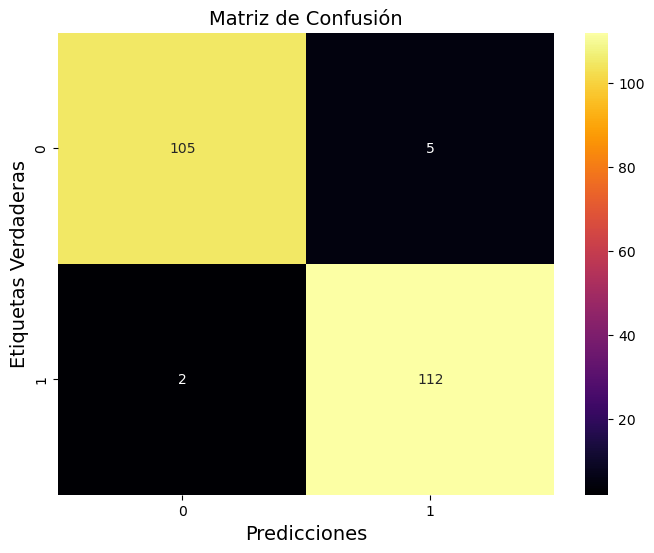

In [67]:
import seaborn as sns

# Calcular la matriz de confusión, las cual nos muestra los falsos positivos y negativos
conf_matrix = confusion_matrix(all_labels, all_preds)

# Visualizar la matriz de confusión con seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="inferno")
plt.title("Matriz de Confusión",fontsize=14)
plt.xlabel("Predicciones", fontsize=14)
plt.ylabel("Etiquetas Verdaderas", fontsize=14)
plt.show()

In [28]:
# cargar el archivo de datos de prueba
with open('unlab_test.pkl', 'rb') as file:
    data_test = pickle.load(file)

# imprimir las keys del diccionario cargado
print(data_test.keys())


dict_keys(['temp_images', 'SNR_images', 'diff_images', 'sci_images', 'ID'])


In [29]:
# obtener las imagenes de prueba
X_test = data_test['sci_images']

# reformatear las imágenes de prueba si es necesario
X_test_tensor = torch.Tensor(X_test.reshape(-1, 1, 21, 21))  # Reformato datos para que sean compatibles con PyTorch


In [30]:
# Realizar predicciones en modo de evaluación
with torch.no_grad():
    test_outputs = model(X_test_tensor)

# Obtener las predicciones finales
_, predicted_labels = torch.max(test_outputs, 1)

# Convertir las etiquetas predichas a una lista de Python
predicted_labels_list = predicted_labels.tolist()

# Imprimir las predicciones
print(predicted_labels_list)


[1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 

In [32]:
import pandas as pd

IDs = data_test['ID']
predicted_labels = predicted_labels_list
data_out = {'ID': IDs, 'predicted': predicted_labels}
df_out = pd.DataFrame(data_out)
df_out.to_csv("predicted112.csv", index=False)
print(df_out)

       ID  predicted
0    4026          1
1    4027          0
2    4028          1
3    4029          1
4    4030          1
..    ...        ...
995  5021          1
996  5022          0
997  5023          1
998  5024          1
999  5025          1

[1000 rows x 2 columns]
